<a href="https://colab.research.google.com/github/SuperShekS/machine-learning/blob/main/Breast%20cancer%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast cancer classification with Logistic Regression

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])


r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

print('Train score : ', model.evaluate(X_train, y_train))
print('Test score : ', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 1.7677 - accuracy: 0.1908 - val_loss: 1.8259 - val_accuracy: 0.1543
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.5210 - accuracy: 0.2126 - val_loss: 1.6767 - val_accuracy: 0.1596
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.3911 - accuracy: 0.2482 - val_loss: 1.5325 - val_accuracy: 0.1862
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.3259 - accuracy: 0.2439 - val_loss: 1.3950 - val_accuracy: 0.1968
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2126 - accuracy: 0.2551 - val_loss: 1.2683 - val_accuracy: 0.2181
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0594 - accuracy: 0.3195 - val_loss: 1.1513 - val_accuracy: 0.2394
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0014 - accuracy: 0.3410 - val_loss: 1.0427 - val_accuracy: 0.3032
Epoch 8/100


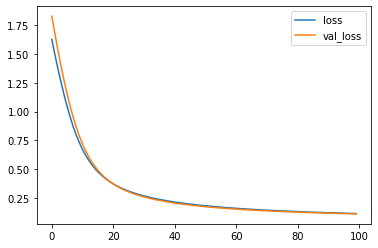

In [24]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

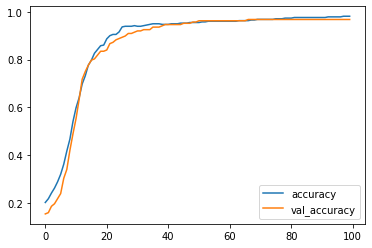

In [25]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [29]:
# Make predictions
P = model.predict(X_test)
print(P) # p(y = 1 | x) 

[[9.2723966e-04]
 [1.4634404e-05]
 [9.8614287e-01]
 [4.0490031e-03]
 [2.9217988e-02]
 [9.7621202e-01]
 [9.2837298e-01]
 [9.2555940e-01]
 [9.2697752e-01]
 [4.2063075e-01]
 [9.8639059e-01]
 [8.0218029e-01]
 [4.5349512e-01]
 [5.2049428e-02]
 [9.7894943e-01]
 [9.7308469e-01]
 [2.6933849e-03]
 [1.3232827e-03]
 [4.3197581e-01]
 [9.9545205e-01]
 [2.8620362e-03]
 [9.2275321e-01]
 [2.7604079e-01]
 [9.9855816e-01]
 [7.1375370e-02]
 [1.5285611e-04]
 [9.4100630e-01]
 [9.6455932e-01]
 [9.8763520e-01]
 [9.7939026e-01]
 [1.6257197e-02]
 [9.5077693e-01]
 [4.2417996e-05]
 [8.9242971e-01]
 [9.8801714e-01]
 [9.7644651e-01]
 [3.4808570e-05]
 [9.2265862e-01]
 [9.3500268e-01]
 [9.3902695e-01]
 [9.9929172e-01]
 [9.5714247e-01]
 [1.0101592e-04]
 [6.5763390e-01]
 [7.4071550e-01]
 [9.6820712e-01]
 [2.1518555e-01]
 [3.8720417e-01]
 [9.3830371e-01]
 [9.7905993e-01]
 [9.0179384e-01]
 [9.9562192e-01]
 [6.6454774e-01]
 [3.1850854e-05]
 [7.9068971e-01]
 [8.8872981e-01]
 [2.0668584e-01]
 [1.0016712e-04]
 [9.9266511e-0

In [31]:
#Roumd to get rounded numbers and flatten to get either 0 or 1
import numpy as np

P = np.round(P).flatten()
print(P)

[0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.]


In [32]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9680851063829787
6/6 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9681
Evaluate output: [0.11348316818475723, 0.9680851101875305]
